In [3]:
import psycopg2 as pg2
import psycopg2.extras as pgex
import pandas as pd

In [9]:
# connexion database dvdrental (postgres docker)
conn = pg2.connect(database='dvdrental', user= <Your_user> , password= <Your_Password_postgres> , host= <container_name>, port=5432)



In [10]:
# Fonction requetes tool SQL 
def requete_SQL_POSTGRES_PG2(requete):
    # créer un curseur pour requêter la bdd 
    cur = conn.cursor(cursor_factory=pgex.RealDictCursor)

    # Execute a query
    cur.execute(requete)
    
    # Retrieve query results
    records = cur.fetchall()
    df = pd.DataFrame(records)
    return df

In [11]:
# Voir les noms des tables de la database dvdrental
cur = conn.cursor(cursor_factory=pgex.RealDictCursor)

cur.execute("""SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")
for table in cur.fetchall():
    print(table)

RealDictRow([('table_name', 'actor')])
RealDictRow([('table_name', 'actor_info')])
RealDictRow([('table_name', 'customer_list')])
RealDictRow([('table_name', 'film_list')])
RealDictRow([('table_name', 'nicer_but_slower_film_list')])
RealDictRow([('table_name', 'sales_by_film_category')])
RealDictRow([('table_name', 'store')])
RealDictRow([('table_name', 'sales_by_store')])
RealDictRow([('table_name', 'staff_list')])
RealDictRow([('table_name', 'address')])
RealDictRow([('table_name', 'category')])
RealDictRow([('table_name', 'city')])
RealDictRow([('table_name', 'country')])
RealDictRow([('table_name', 'customer')])
RealDictRow([('table_name', 'film_actor')])
RealDictRow([('table_name', 'film_category')])
RealDictRow([('table_name', 'inventory')])
RealDictRow([('table_name', 'language')])
RealDictRow([('table_name', 'rental')])
RealDictRow([('table_name', 'staff')])
RealDictRow([('table_name', 'payment')])
RealDictRow([('table_name', 'film')])


In [5]:
# voir dataframe table film
film = requete_SQL_POSTGRES_PG2("SELECT * FROM film")

film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,[Deleted Scenes],'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [6]:
# voir les valeurs uniques de la table film
for c in list(film.columns):
    print(requete_SQL_POSTGRES_PG2(f"SELECT DISTINCT {c} FROM film"))

     film_id
0        652
1        273
2         51
3        951
4        839
..       ...
995       64
996       55
997      148
998      790
999      828

[1000 rows x 1 columns]
                  title
0    Graceland Dynamite
1              Opus Ice
2      Braveheart Human
3        Wonderful Drop
4       Rush Goodfellas
..                  ...
995  Gathering Calendar
996      Drums Dynamite
997        Samurai Lion
998        Pond Seattle
999       Pearl Destiny

[1000 rows x 1 columns]
                                           description
0    A Boring Saga of a Database Administrator And ...
1    A Thrilling Documentary of a Husband And a Fem...
2    A Astounding Story of a Girl And a Boy who mus...
3    A Insightful Tale of a Database Administrator ...
4    A Amazing Character Study of a Mad Cow And a S...
..                                                 ...
995  A Epic Yarn of a Forensic Psychologist And a T...
996  A Epic Display of a Pioneer And a Student who ...
997  A Emot

In [7]:
#Vérification data_type (table payment)
requete_SQL_POSTGRES_PG2("""SELECT table_schema, table_name, column_name, data_type FROM INFORMATION_SCHEMA.COLUMNS 
WHERE table_name = 'payment'""")

,table_schema,table_name,column_name,data_type
0,public,payment,payment_id,integer
1,public,payment,customer_id,smallint
2,public,payment,staff_id,smallint
3,public,payment,rental_id,integer
4,public,payment,amount,numeric
5,public,payment,payment_date,timestamp without time zone


# How many payment transactions were greater than $5.00?

- [X] Il y a 3618 transactions > 5

In [8]:
# voir table payment
payment = requete_SQL_POSTGRES_PG2("SELECT * FROM payment")
payment

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577
...,...,...,...,...,...,...
14591,32094,245,2,12682,2.99,2007-05-14 13:44:29.996577
14592,32095,251,1,14107,0.99,2007-05-14 13:44:29.996577
14593,32096,252,2,13756,4.99,2007-05-14 13:44:29.996577
14594,32097,263,1,15293,0.99,2007-05-14 13:44:29.996577


In [9]:
# Voir les valeurs uniques pour chaques colonnes 
for c in list(payment.columns):
    print(requete_SQL_POSTGRES_PG2(f"SELECT DISTINCT {c} FROM payment"))

       payment_id
0           17503
1           17504
2           17505
3           17506
4           17507
...           ...
14591       32094
14592       32095
14593       32096
14594       32097
14595       32098

[14596 rows x 1 columns]
     customer_id
0            184
1             87
2            477
3            273
4            550
..           ...
594          449
595           64
596          520
597           55
598          148

[599 rows x 1 columns]
   staff_id
0         1
1         2
       rental_id
0           1158
1           1159
2           1160
3           1163
4           1164
...          ...
14587      16045
14588      16046
14589      16047
14590      16048
14591      16049

[14592 rows x 1 columns]
   amount
0    1.99
1   10.99
2    2.99
3    9.98
4    6.99
5   11.99
6    7.99
7    8.97
8    0.00
9    4.99
10   5.99
11   5.98
12   0.99
13   3.98
14   1.98
15   9.99
16   7.98
17   8.99
18   3.99
                    payment_date
0     2007-04-30 11:12:24.99657

In [10]:
# solution
requete_SQL_POSTGRES_PG2("SELECT COUNT(amount) FROM payment WHERE amount > 5")

,count
0,3618


# How many actors have a first name that starts with the letter P?

- [X] Il y a 5 acteurs qui ont un first name qui commence par la lettre P 

In [11]:
# voir table payment
actor = requete_SQL_POSTGRES_PG2("SELECT * FROM actor")
actor

,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620
...,...,...,...,...
195,196,Bela,Walken,2013-05-26 14:47:57.620
196,197,Reese,West,2013-05-26 14:47:57.620
197,198,Mary,Keitel,2013-05-26 14:47:57.620
198,199,Julia,Fawcett,2013-05-26 14:47:57.620


In [12]:
# voir tous les acteurs (first_name) qui commence par lettre P 
requete_SQL_POSTGRES_PG2(""" SELECT actor_id, first_name, last_name FROM actor WHERE first_name LIKE 'P%' """)

,actor_id,first_name,last_name
0,1,Penelope,Guiness
1,46,Parker,Goldberg
2,54,Penelope,Pinkett
3,104,Penelope,Cronyn
4,120,Penelope,Monroe


In [13]:
# solution
requete_SQL_POSTGRES_PG2(""" SELECT COUNT(first_name) FROM actor WHERE first_name LIKE 'P%' """)

,count
0,5


# How many unique districts are our customers from?

- [X] Il y a 378 unique districts pour nos clients

In [15]:
address = requete_SQL_POSTGRES_PG2("SELECT * FROM address")
address.describe()

,address_id,city_id
count,603.000000,603.000000
mean,302.719735,300.525705
std,174.853150,173.600949
min,1.000000,1.000000
25%,151.500000,150.500000
50%,303.000000,300.000000
75%,453.500000,450.500000
max,605.000000,600.000000


# Retrieve the list of names for those distinct districts from the previous question.



In [16]:
# voir table address
requete_SQL_POSTGRES_PG2("SELECT * FROM address")

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,Alberta,300,,,2006-02-15 09:45:30
1,2,28 MySQL Boulevard,None,QLD,576,,,2006-02-15 09:45:30
2,3,23 Workhaven Lane,None,Alberta,300,,14033335568,2006-02-15 09:45:30
3,4,1411 Lillydale Drive,None,QLD,576,,6172235589,2006-02-15 09:45:30
4,5,1913 Hanoi Way,,Nagasaki,463,35200,28303384290,2006-02-15 09:45:30
...,...,...,...,...,...,...,...,...
598,601,844 Bucuresti Place,,Liaoning,242,36603,935952366111,2006-02-15 09:45:30
599,602,1101 Bucuresti Boulevard,,West Greece,401,97661,199514580428,2006-02-15 09:45:30
600,603,1103 Quilmes Boulevard,,Piura,503,52137,644021380889,2006-02-15 09:45:30
601,604,1331 Usak Boulevard,,Vaud,296,61960,145308717464,2006-02-15 09:45:30


In [17]:
# solution
requete_SQL_POSTGRES_PG2("SELECT DISTINCT district FROM address")

,district
0,Aden
1,Eastern Visayas
2,Vaduz
3,Tokat
4,Anzotegui
...,...
373,Rostov-na-Donu
374,Sind
375,Nghe An
376,Ktahya


# How many films have a rating of R and a replacement cost between $5 and $15?

- [X] Il y a 52 films 

In [18]:
film = requete_SQL_POSTGRES_PG2("SELECT * FROM film")
film[film['replacement_cost'] > 5]

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,[Deleted Scenes],'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [19]:
requete_SQL_POSTGRES_PG2(""" SELECT replacement_cost, rating 
                             FROM film 
                             WHERE rating = 'R' AND replacement_cost BETWEEN 5 AND 15 
                             LIMIT 10 """)

,replacement_cost,rating
0,14.99,R
1,9.99,R
2,11.99,R
3,11.99,R
4,11.99,R
5,10.99,R
6,13.99,R
7,12.99,R
8,13.99,R
9,13.99,R


In [20]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT COUNT(replacement_cost)
                             FROM film 
                             WHERE rating = 'R' AND replacement_cost BETWEEN 5 AND 15  """)



,count
0,52


# How many films have the word Truman somewhere in the title?
- [X] Il y a 5 title 

In [21]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT title 
                             FROM film
                             WHERE title LIKE '%Truman%' """)


,title
0,Agent Truman
1,Lover Truman
2,Minds Truman
3,Mystic Truman
4,Truman Crazy


In [22]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT COUNT(title)
                             FROM film
                             WHERE title LIKE '%Truman%' """)

,count
0,5


# Find first_name customers containing John, Jack, Julie

In [23]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT first_name FROM customer WHERE first_name IN ('John', 'Jack', 'Julie') """)

,first_name
0,Julie
1,John
2,Jack


# How many first_name customers not containing John, Jack, Julie

- [X] Il y a 596 first_name


In [24]:
# solution
requete_SQL_POSTGRES_PG2(""" SELECT COUNT(first_name)
                             FROM customer 
                             WHERE first_name NOT IN ('John', 'Jack', 'Julie') """)

,count
0,596


# how many payments did each staff member handle and who gets the bonus ?

- [X] staff_id = 1  (7292)

- [X] staff_id = 2  (7304)

In [25]:
payment = requete_SQL_POSTGRES_PG2(""" SELECT * from payment""")
payment.groupby(by='staff_id').count()

,payment_id,customer_id,rental_id,amount,payment_date
staff_id,,,,,
1,7292,7292,7292,7292,7292
2,7304,7304,7304,7304,7304


In [26]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT staff_id, COUNT(payment_id) AS payment_id_count
                             from payment
                             GROUP BY staff_id """)

,staff_id,payment_id_count
0,1,7292
1,2,7304


# what is average replacement cost per MPPA rating ?

In [32]:
# what is average replacement cost per MPPA rating ?


# Solution
df = requete_SQL_POSTGRES_PG2(""" SELECT rating AS MPPA_rating, ROUND(AVG(replacement_cost),2) AS replacement_cost_mean
                             FROM film 
                             GROUP BY rating
                            """)
df

,mppa_rating,replacement_cost_mean
0,G,20.12
1,PG-13,20.40
2,PG,18.96
3,R,20.23
4,NC-17,20.14


<AxesSubplot: title={'center': 'Average replacement cost per MPPA rating'}, xlabel='mppa_rating', ylabel='replacement_cost_mean'>

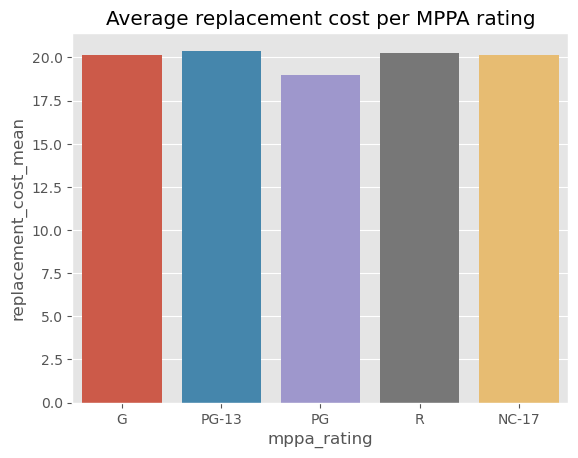

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Average replacement cost per MPPA rating
plt.title('Average replacement cost per MPPA rating')
sns.barplot(data=df, x="mppa_rating", y="replacement_cost_mean")

# what are the customer ids of the top 5 customers by total spend ? 

quels sont les identifiants client des 5 premiers clients en termes de dépenses totales ?

In [34]:
# Solution
df = requete_SQL_POSTGRES_PG2(""" SELECT customer_id, SUM(amount) AS total_spend
                             FROM payment
                             GROUP BY customer_id
                             ORDER BY total_spend DESC 
                             LIMIT 5""")
df

,customer_id,total_spend
0,148,211.55
1,526,208.58
2,178,194.61
3,137,191.62
4,144,189.60


<AxesSubplot: title={'center': '5 bests customers total spend'}, xlabel='customer_id', ylabel='total_spend'>

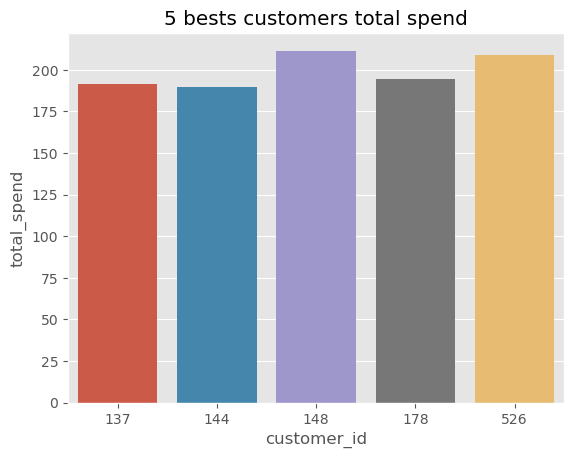

In [35]:
# 5 bests customers total spend
plt.title('5 bests customers total spend')
sns.barplot(data=df, x="customer_id", y="total_spend")

# what customer ids are eligible for platinium status ?

In [263]:
# voir dataframe
requete_SQL_POSTGRES_PG2(""" SELECT *
                             FROM payment """)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577
...,...,...,...,...,...,...
14591,32094,245,2,12682,2.99,2007-05-14 13:44:29.996577
14592,32095,251,1,14107,0.99,2007-05-14 13:44:29.996577
14593,32096,252,2,13756,4.99,2007-05-14 13:44:29.996577
14594,32097,263,1,15293,0.99,2007-05-14 13:44:29.996577


In [266]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT customer_id, COUNT(*)
                             FROM payment
                             GROUP BY customer_id
                             HAVING COUNT(*) >= 40
                             """)

,customer_id,count
0,144,40
1,526,42
2,148,45


Assessment Test 1
ASSESSMENT TEST 1

COMPLETE THE FOLLOWING TASKS!

1. Return the customer IDs of customers who have spent at least $110 with the staff member who has an ID of 2.

The answer should be customers 187 and 148.

2. How many films begin with the letter J?

The answer should be 20.

3. What customer has the highest customer ID number whose name starts with an 'E' and has an address ID lower than 500?

The answer is Eddie Tomlin

# Return the customer IDs of customers who have spent at least $110 with the staff member who has an ID of 2.

- [X] customer ID 187 ($110.81)

- [X] customer ID 148 ($110.78)

In [38]:
print(payment['amount'].max())
print(payment['amount'].min())

11.99
0.00


In [39]:
#Voir dataframe
requete_SQL_POSTGRES_PG2(""" SELECT staff_id, amount, customer_id
                             FROM payment
                             WHERE staff_id = 2
                             """)

,staff_id,amount,customer_id
0,2,7.99,341
1,2,2.99,341
2,2,7.99,341
3,2,5.99,342
4,2,4.99,343
...,...,...,...
7299,2,0.99,229
7300,2,4.99,244
7301,2,2.99,245
7302,2,4.99,252


In [40]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT customer_id, SUM(amount) AS spent_at_least_$110
                             FROM payment
                             WHERE staff_id = 2
                             GROUP BY customer_id
                             HAVING SUM(amount)  > 110
                             """)

,customer_id,spent_at_least_$110
0,187,110.81
1,148,110.78


# How many films begin with the letter J?

- [X] Il y a 20 films qui commencent pas J

In [41]:
# voir dataframe
requete_SQL_POSTGRES_PG2(""" SELECT *
                             FROM film
                             LIMIT 10 """)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
5,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ace':1 'administr':9 'ancient':19 'astound':4...
6,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'adapt':1 'astound':4 'baloon':19 'car':11 'fa...
7,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,2013-05-26 14:50:58.951,"[Commentaries, Behind the Scenes]",'affair':1 'chase':14 'documentari':5 'fanci':...
8,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,2013-05-26 14:50:58.951,[Deleted Scenes],'african':1 'chef':11 'dentist':14 'documentar...
9,6,Agent Truman,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,3,2.99,169,17.99,PG,2013-05-26 14:50:58.951,[Deleted Scenes],'agent':1 'ancient':19 'boy':11 'china':20 'es...


In [42]:
# solution
requete_SQL_POSTGRES_PG2(""" SELECT COUNT(title) AS title_begin_J
                             FROM film
                             WHERE title LIKE 'J%' """)

,title_begin_j
0,20


# What customer has the highest customer ID number whose name starts with an 'E' and has an address ID lower than 500?

- [X] Eddie Tomlin

In [43]:
# voir dataframe
requete_SQL_POSTGRES_PG2(""" SELECT * 
                             FROM customer""")

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1
...,...,...,...,...,...,...,...,...,...,...
594,595,1,Terrence,Gunderson,terrence.gunderson@sakilacustomer.org,601,True,2006-02-14,2013-05-26 14:49:45.738,1
595,596,1,Enrique,Forsythe,enrique.forsythe@sakilacustomer.org,602,True,2006-02-14,2013-05-26 14:49:45.738,1
596,597,1,Freddie,Duggan,freddie.duggan@sakilacustomer.org,603,True,2006-02-14,2013-05-26 14:49:45.738,1
597,598,1,Wade,Delvalle,wade.delvalle@sakilacustomer.org,604,True,2006-02-14,2013-05-26 14:49:45.738,1


In [44]:
# solution 
requete_SQL_POSTGRES_PG2(""" SELECT customer_id, first_name ,last_name , address_id
                             FROM customer 
                             WHERE first_name LIKE 'E%' AND address_id < 500
                             ORDER BY customer_id DESC
                             LIMIT 1
                             """)

,customer_id,first_name,last_name,address_id
0,434,Eddie,Tomlin,439


# Trouver les titres de films ou se trouve acteur Nick Wahlberg

- [X] Actor Nick Wahlberg joue dans 25 films 

In [46]:
# Solution
requete_SQL_POSTGRES_PG2("""SELECT title, first_name, last_name
                            FROM film 
                            LEFT JOIN film_actor
                            ON film.film_id = film_actor.film_id 
                            LEFT JOIN actor
                            ON film_actor.actor_id = actor.actor_id
                            WHERE first_name = 'Nick' AND last_name = 'Wahlberg' """)

,title,first_name,last_name
0,Adaptation Holes,Nick,Wahlberg
1,Apache Divine,Nick,Wahlberg
2,Baby Hall,Nick,Wahlberg
3,Bull Shawshank,Nick,Wahlberg
4,Chainsaw Uptown,Nick,Wahlberg
5,Chisum Behavior,Nick,Wahlberg
6,Destiny Saturday,Nick,Wahlberg
7,Dracula Crystal,Nick,Wahlberg
8,Fight Jawbreaker,Nick,Wahlberg
9,Flash Wars,Nick,Wahlberg


# During which month did payments occur,  
# Format your answer to return back the full month name (Timestamp) 

In [52]:
# voir dataframe
requete_SQL_POSTGRES_PG2(""" SELECT *
                             FROM payment """)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996577
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996577
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996577
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996577
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996577
...,...,...,...,...,...,...
14591,32094,245,2,12682,2.99,2007-05-14 13:44:29.996577
14592,32095,251,1,14107,0.99,2007-05-14 13:44:29.996577
14593,32096,252,2,13756,4.99,2007-05-14 13:44:29.996577
14594,32097,263,1,15293,0.99,2007-05-14 13:44:29.996577


In [61]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT DISTINCT(TO_CHAR(payment_date,'MONTH')) as month_payments
                             FROM payment """)

,month_payments
0,MARCH
1,MAY
2,FEBRUARY
3,APRIL


# How many payments occured on monday ? 

In [89]:
# Solution
requete_SQL_POSTGRES_PG2(""" SELECT COUNT(*) as count_payments_monday
                             FROM payment
                             WHERE EXTRACT(dow FROM payment_date) = 1 """)

,count_payments_monday
0,2948


# REGEX (expression réguliére)

In [90]:

# Solution
requete_SQL_POSTGRES_PG2("""SELECT * 
                            FROM address """)

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,Alberta,300,,,2006-02-15 09:45:30
1,2,28 MySQL Boulevard,None,QLD,576,,,2006-02-15 09:45:30
2,3,23 Workhaven Lane,None,Alberta,300,,14033335568,2006-02-15 09:45:30
3,4,1411 Lillydale Drive,None,QLD,576,,6172235589,2006-02-15 09:45:30
4,5,1913 Hanoi Way,,Nagasaki,463,35200,28303384290,2006-02-15 09:45:30
...,...,...,...,...,...,...,...,...
598,601,844 Bucuresti Place,,Liaoning,242,36603,935952366111,2006-02-15 09:45:30
599,602,1101 Bucuresti Boulevard,,West Greece,401,97661,199514580428,2006-02-15 09:45:30
600,603,1103 Quilmes Boulevard,,Piura,503,52137,644021380889,2006-02-15 09:45:30
601,604,1331 Usak Boulevard,,Vaud,296,61960,145308717464,2006-02-15 09:45:30


# We want to know and compare the various amounts of films we have per movie rating

# Nous voulons connaître et comparer les différentes quantités de films que nous avons par classement de film

In [181]:
# voir dataframe 
requete_SQL_POSTGRES_PG2("""SELECT *
                            FROM film
                            
                            """)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,[Deleted Scenes],'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [152]:
# Solution
requete_SQL_POSTGRES_PG2("""SELECT rating , COUNT(rating)
                            FROM film
                            GROUP BY rating
                            """)

,rating,count
0,G,178
1,PG-13,223
2,PG,194
3,R,195
4,NC-17,210


In [278]:
# voir colonne 
requete_SQL_POSTGRES_PG2("""SELECT
                            CASE 
                                WHEN rating = 'R' THEN 'R_rating'
                                WHEN rating = 'PG-13' THEN 'PG-13_rating'
                                WHEN rating = 'PG' THEN 'PG_rating'
                                WHEN rating = 'G' THEN 'G_rating'
                                WHEN rating = 'NC-17' THEN 'G_rating'
                                ELSE 'not_rating'
                            END as result
                           
                            FROM film; """)

,result
0,G_rating
1,R_rating
2,R_rating
3,PG-13_rating
4,PG_rating
...,...
995,G_rating
996,G_rating
997,G_rating
998,R_rating


In [309]:
# Solution avec case 
requete_SQL_POSTGRES_PG2("""SELECT
                            SUM(
                            CASE rating
                                WHEN 'R' THEN 1 ELSE 0 
                                END
                            ) AS R, 
                            
                            SUM(
                            CASE rating
                                WHEN 'PG' THEN 1 ELSE 0 
                                END
                            ) AS PG,
                            
                            SUM(
                            CASE rating
                                WHEN 'G' THEN 1 ELSE 0 
                                END
                            ) AS G,
                            
                            SUM(
                            CASE rating
                                WHEN 'NC-17' THEN 1 ELSE 0 
                                END
                            ) AS NC17, 
                            
                            SUM(
                            CASE rating
                                WHEN 'PG-13' THEN 1 ELSE 0 
                                END
                            ) AS PG13
                            FROM film """)

,r,pg,g,nc17,pg13
0,195,194,178,210,223


# replace none per Non_renseigné in column address2

In [6]:
# Solution
requete_SQL_POSTGRES_PG2("""SELECT 
                            COALESCE(address2, 'Non_renseigné')
                            
                            FROM address""")

,coalesce
0,Non_renseigné
1,Non_renseigné
2,Non_renseigné
3,Non_renseigné
4,
...,...
598,
599,
600,
601,
